In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%reload_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import pandas as pd
from pathlib import Path

from src.data.import_census_datasets import get_census_1991_to_2016_pictou_county

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_path = Path("../../data")  # points to the notebook folder
processed_path = data_path / "processed"

In [3]:
df = pd.read_pickle(processed_path / "census_1991_to_2016_pictou_county.pickle")
len(df)
df.dtypes
df.columns

583

Age            int64
Female       float64
Male         float64
Total        float64
Year           int64
AgeGroup    category
dtype: object

Index(['Age', 'Female', 'Male', 'Total', 'Year', 'AgeGroup'], dtype='object')

In [16]:
_df = df.groupby(["Year", "AgeGroup"]).sum().reset_index()
_df.head()

,Year,AgeGroup,Age,Female,Male,Total
0,1991,0-4,15,1905.0,1945.0,3850.0
1,1991,5-9,40,1805.0,1850.0,3655.0
2,1991,10-14,65,1905.0,1995.0,3895.0
3,1991,15-19,90,1985.0,2105.0,4095.0
4,1991,20-24,115,1655.0,1595.0,3250.0


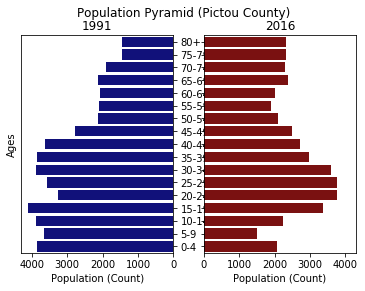

In [18]:
fig, axes = plt.subplots(ncols=2, sharey=True, sharex=True)

left_year = 1991
right_year = 2016

sns.barplot(
    x="Total",
    y="AgeGroup",
    color="darkblue",
    ax=axes[0],
    data=_df[_df.Year == left_year],
)
sns.barplot(
    x="Total",
    y="AgeGroup",
    color="darkred",
    ax=axes[1],
    data=_df[_df.Year == right_year],
)

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
axes[0].set_title(left_year)
axes[1].set_title(right_year)
axes[0].set(xlabel="Population (Count)", ylabel="Ages")
axes[1].set(xlabel="Population (Count)", ylabel="")
fig.suptitle("Population Pyramid (Pictou County)")

plt.show();